**Business Case: Yulu - Hypothesis Testing**

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.




**The company wants to know:**


Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
! gdown 13xyWdNTezJkl6iEvCDI6haX8k-_pqD8R

Downloading...
From: https://drive.google.com/uc?id=13xyWdNTezJkl6iEvCDI6haX8k-_pqD8R
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 118MB/s]


In [ ]:
df = pd.read_csv("yulu.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["season"].replace(to_replace = [1,2,3,4],value=['Spring','Summer','Fall','Winter'],inplace=True)

df["weather"].replace(to_replace = [1,2,3,4],value=['Clear','Misty','Light Showers','Heavy Showers'],inplace=True)

df["holiday"].replace(to_replace = [1,0],value=['Yes','No'],inplace=True)

df["workingday"].replace(to_replace=[1,0],value=['Working','Non-Working'],inplace=True)

Cleaning the data for better analysis and changing data types for better information.

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Checking for nulls in the dataset.

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Statistical summary of the data :     

Median count of riders is 284.

Median temperature was 26.24 whereas Median humidity was 62.0.

Non - Visual Analysis

In [ ]:
df["season"].value_counts()

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64

In [ ]:
df["weather"].value_counts()

Clear            7192
Misty            2834
Light Showers     859
Heavy Showers       1
Name: weather, dtype: int64

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df["date"] = df["datetime"].dt.date

In [ ]:
df["time"] = df["datetime"].dt.time

In [ ]:
df.drop('datetime',axis=1,inplace = True)

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,Spring,No,Non-Working,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,Spring,No,Non-Working,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,Spring,No,Non-Working,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,Spring,No,Non-Working,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,Spring,No,Non-Working,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


UNIVARIATE ANALYSIS

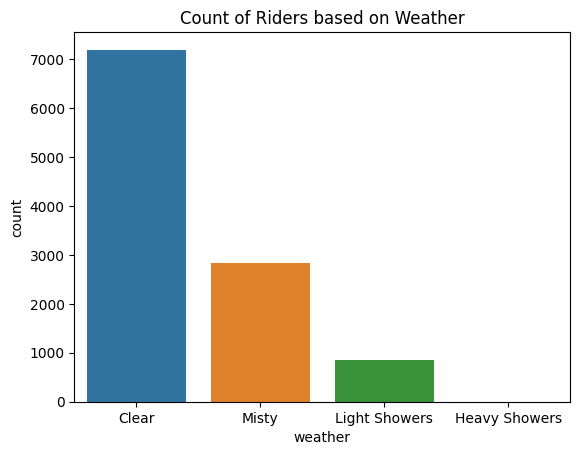

In [ ]:
sns.countplot(data=df,x='weather')
plt.title("Count of Riders based on Weather")
plt.show()

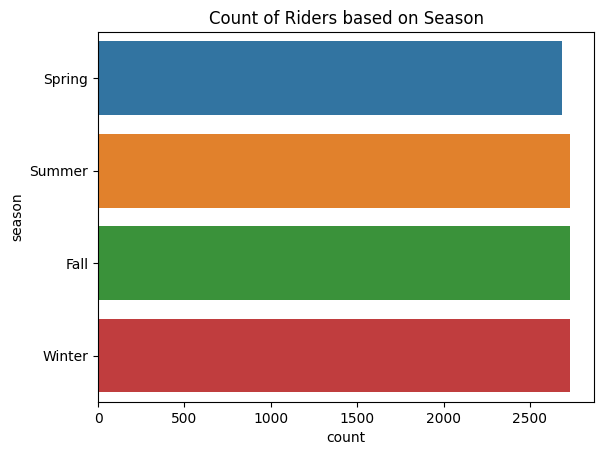

In [ ]:
sns.countplot(data=df,y='season')
plt.title("Count of Riders based on Season")
plt.show()

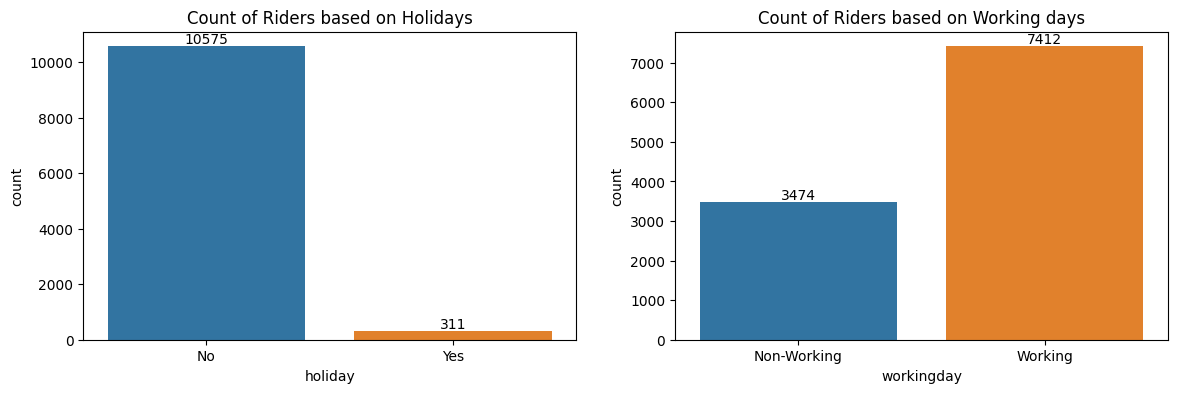

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 4))

sns.countplot(data=df,x='holiday',ax=ax[0])
sns.countplot(data=df,x ='workingday',ax=ax[1])
ax[0].set_title("Count of Riders based on Holidays")
ax[0].bar_label(ax[0].containers[0])
ax[1].set_title("Count of Riders based on Working days")
ax[1].bar_label(ax[1].containers[0])
plt.show()

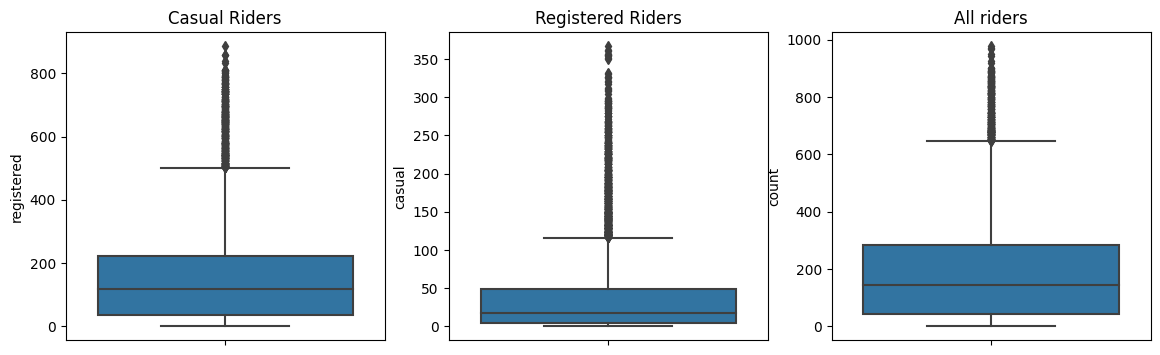

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14, 4))

sns.boxplot(data=df,y='registered',ax=ax[0])
sns.boxplot(data=df,y ='casual',ax=ax[1])
sns.boxplot(data=df,y ='count',ax=ax[2])
ax[0].set_title("Casual Riders")
ax[1].set_title("Registered Riders")
ax[2].set_title('All riders')
plt.show()

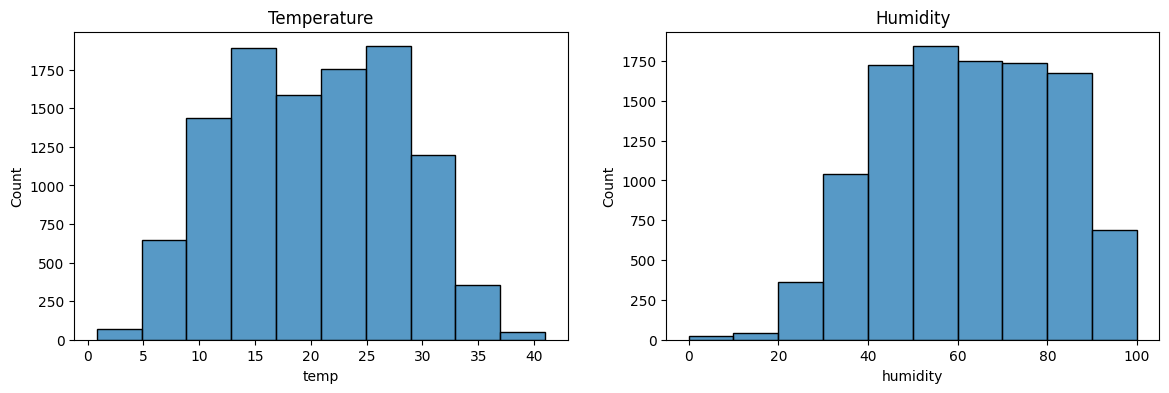

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 4))

sns.histplot(df["temp"],bins=10,ax=ax[0])
sns.histplot(df["humidity"],bins=10,ax=ax[1])
ax[0].set_title("Temperature")
ax[1].set_title("Humidity")
plt.show()

BI-VARIATE ANALYSIS

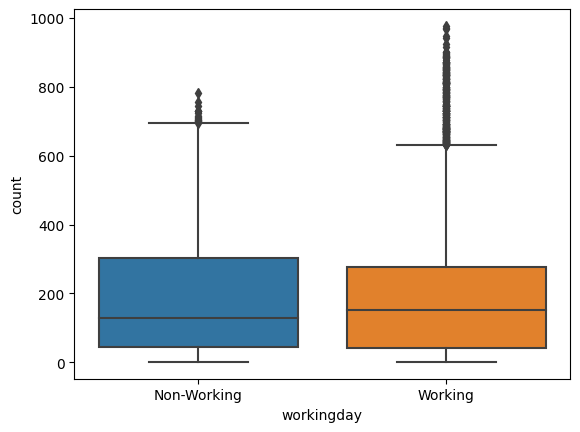

In [ ]:
sns.boxplot(data=df,x='workingday',y='count')
plt.show()

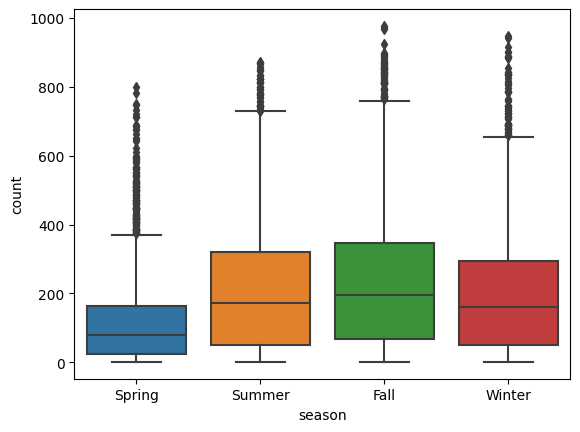

In [ ]:
sns.boxplot(data=df,x='season',y='count')
plt.show()

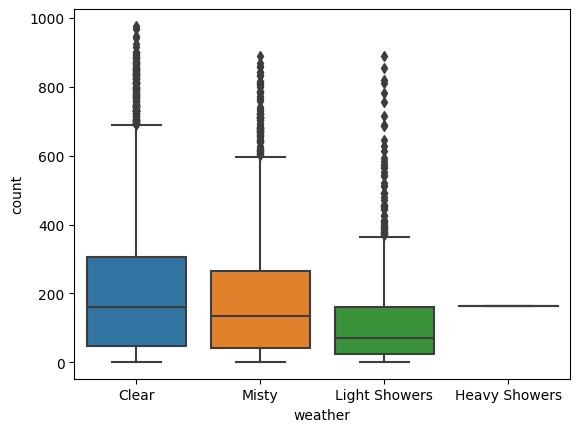

In [ ]:
sns.boxplot(data=df,x='weather',y='count')
plt.show()

MULTIVARIATE ANALYSIS

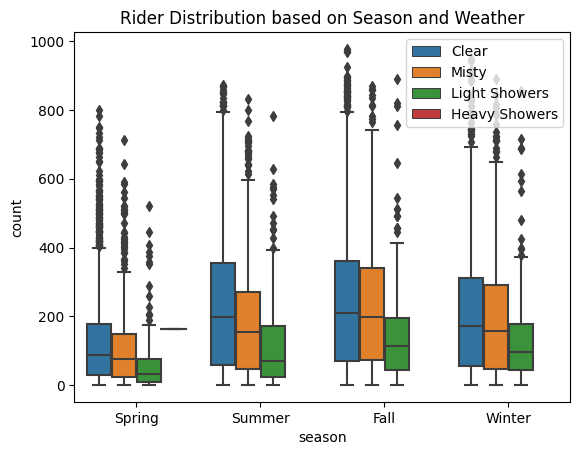

In [ ]:
sns.boxplot(data=df,x='season',y='count',hue='weather')
plt.legend(loc='upper right')
plt.title('Rider Distribution based on Season and Weather')
plt.show()

<ipython-input-25-c80ebdab5e79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


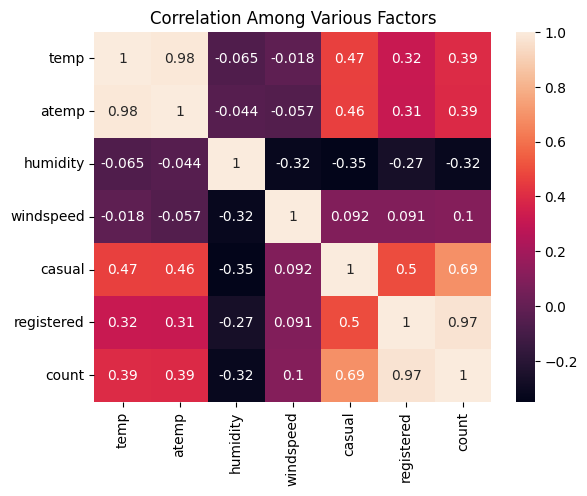

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Among Various Factors')
plt.show()


HYPOTHESIS TESTING

For all our statistical tests, we would be taking our significance level(alpha) to be - 0.05.

**HYPOTHESIS TEST - 1**


2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Null Hypothesis : Working Day has no effect on the number of cycles rented

Alternate Hypothesis : Working day has quite an impact on the cycles being rented.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
non_working = df[df["workingday"]== 'Non-Working']["count"]
working = df[df["workingday"]== 'Working']["count"]

In [ ]:
ttest_ind(working,non_working)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

Conclusion : After performing T-Test, we get the p-value to be 0.22 which is higher than the significance level set, hence we fail to reject the null hypothesis and we can conclude that Working day has no impact on the riders renting cycles.

**HYPOTHESIS TEST - 2**

2- Sample T-Test to check if Holiday has an effect on the number of electric cycles rented

Null Hypothesis : Holiday has no effect on the number of cycles rented

Alternate Hypothesis : Holiday day has quite an impact on the cycles being rented.

In [ ]:
holiday = df[df["holiday"]== 'Yes']["count"]
not_holiday = df[df["holiday"]== 'No']["count"]

In [ ]:
ttest_ind(holiday,not_holiday)

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.5736923883271103)

Conclusion: After performing T-Test, we get the p-value to be 0.57 which is much higher than the significance level set, hence we fail to reject the null hypothesis and we can conclude that Holiday or not has no impact on the riders renting cycles.

**HYPOTHESIS TEST - 3**

ANNOVA test to check if No. of cycles rented is similar or different in different weather

Null Hypothesis : Weather has no effect on the number of cycles rented

Alternate Hypothesis : Weather has quite an impact on the cycles being rented

In [ ]:
from scipy.stats import f_oneway

Before moving ahead with the Annova test let us test the assumptions of Annova which are the normality and equal variance test.

Firstly let's do the normality test by plotting a qq plot.

In [ ]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
clear = df[df["weather"]== 'Clear']["count"]
misty = df[df["weather"]== 'Misty']["count"]
light_s = df[df["weather"]== 'Light Showers']["count"]
heavy_s = df[df["weather"]== 'Heavy Showers']["count"]

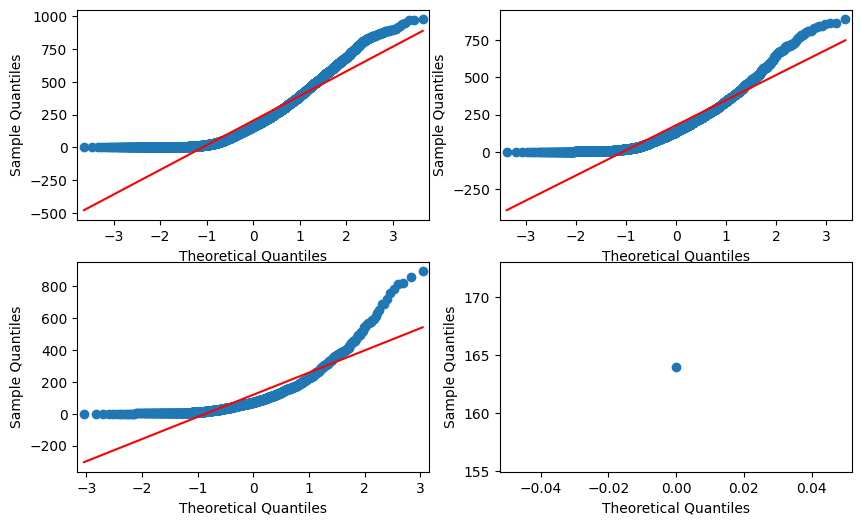

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 6))

qqplot(clear,line='s',ax=ax[0,0])
qqplot(misty,line='s',ax=ax[0,1])
qqplot(light_s,line='s',ax=ax[1,0])
qqplot(heavy_s,line='s',ax=ax[1,1])
plt.show()

We can see the data isn't gaussian as none of the graphs form a complete straight line and show some form of skewness either at the start or the end, hence the Normality test fails.

Performing the equal variance test (LEVENE TEST)

Null Hypothesis : Variances are Equal

Alternate Hypothesis : Variances are not equal

In [ ]:
from scipy.stats import levene

In [ ]:
levene(clear,misty,light_s,heavy_s)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

The p-value(3.504937946833238e-35) is very minimal almost tending to zero hence we reject the null hypothesis and thus the variances are unequal.

Ideally since both the normality and variance test failed we should go forward with Kruskal Wallis test but let's perform both and compare statistics and p-value.

In [ ]:
from scipy.stats import kruskal

kruskal(clear,misty,light_s,heavy_s)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

In [ ]:
f_oneway(clear,misty,light_s,heavy_s)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

Conclusion : From the above statistical tests we get the p-value(3.501611300708679e-44) to be very very minute compared to our set significance level (0.05), Thus we reject the null hypothesis and come to the conclusion that Weather does have a huge impact on the number of cycles being rented by the riders.

**HYPOTHESIS TEST - 4**

ANNOVA test to check if No. of cycles rented is similar or different in different season

Null Hypothesis : Season has no effect on the number of cycles rented

Alternate Hypothesis : Season has quite an impact on the cycles being rented

In [ ]:
spring = df[df["season"]== 'Spring']["count"]
summer = df[df["season"]== 'Summer']["count"]
fall = df[df["season"]== 'Fall']["count"]
winter = df[df["season"]== 'Winter']["count"]

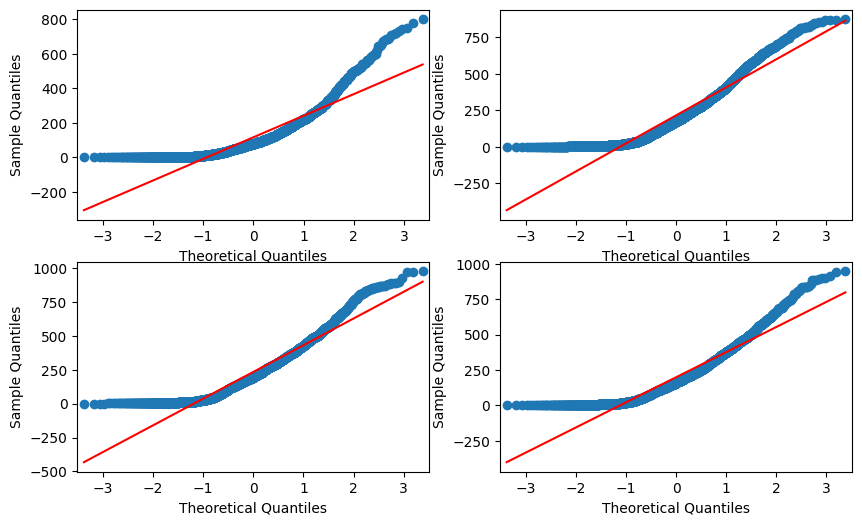

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 6))

qqplot(spring,line='s',ax=ax[0,0])
qqplot(summer,line='s',ax=ax[0,1])
qqplot(fall,line='s',ax=ax[1,0])
qqplot(winter,line='s',ax=ax[1,1])
plt.show()

We can see the data isn't gaussian as none of the graphs form a complete straight line and show some form of skewness either at the start or the end, hence the Normality test fails.

Performing the equal variance test (LEVENE TEST)

Null Hypothesis : Variances are Equal

Alternate Hypothesis : Variances are not equal

In [ ]:
levene(spring,summer,fall,winter)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

The p-value(1.0147116860043298e-118) is very minimal almost tending to zero hence we reject the null hypothesis and thus the variances are unequal.

Ideally since both the normality and variance test failed we should go forward with Kruskal Wallis test but let's perform both and compare statistics and p-value.

In [ ]:
kruskal(spring,summer,fall,winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [ ]:
f_oneway(spring,summer,fall,winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

Conclusion : From the above statistical tests we get the p-value(2.479008372608633e-151) to be very very minute compared to our set significance level (0.05), Thus we reject the null hypothesis and come to the conclusion that Season does have a huge impact on the number of cycles being rented by the riders.

**HYPOTHESIS TEST - 5**

Chi-square test to check if Weather is dependent on the season

Null Hypothesis : Season has no effect on the weather

Alternate Hypothesis : Season has quite an impact on the weather

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
table = pd.crosstab( df["weather"],df["season"],margins=True)
table

season,Fall,Spring,Summer,Winter,All
weather,,,,,
Clear,1930,1759,1801,1702,7192
Heavy Showers,0,1,0,0,1
Light Showers,199,211,224,225,859
Misty,604,715,708,807,2834
All,2733,2686,2733,2734,10886


In [ ]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=3.118527332512692e-05, dof=16, expected_freq=array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03,
        7.19200000e+03],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01,
        1.00000000e+00],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02,
        8.59000000e+02],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02,
        2.83400000e+03],
       [2.73300000e+03, 2.68600000e+03, 2.73300000e+03, 2.73400000e+03,
        1.08860000e+04]]))

In order to perform chi-squared test we know that the variables must be categorical but the expected value in each cell should be greater than 5.

If we see in the above table 'Heavy Showers' row have cells that are less than 5 so the chisquared test that we have done wouldn't be that accurate.

Let's drop that row and perform our tests

In [ ]:
table.drop('Heavy Showers',inplace=True)

In [ ]:
table

season,Fall,Spring,Summer,Winter,All
weather,,,,,
Clear,1930,1759,1801,1702,7192
Light Showers,199,211,224,225,859
Misty,604,715,708,807,2834
All,2733,2686,2733,2734,10886


In [ ]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=46.10362310240902, pvalue=6.658850681748292e-06, dof=12, expected_freq=array([[ 1805.68058426,  1774.29755179,  1805.68058426,  1806.34127968,
         7192.        ],
       [  215.66735566,   211.91902072,   215.66735566,   215.74626797,
          859.        ],
       [  711.52652611,   699.16007533,   711.52652611,   711.78687244,
         2834.        ],
       [ 2733.12553397,  2685.62335217,  2733.12553397,  2734.1255799 ,
        10886.        ]]))

**Conclusion** : After cleaning our table and performing chi-squared test we get the p-value(6.658850681748292e-06) to be even lesser than our previous p-value(3.118527332512692e-05) and as it is very minimal compared to our significance level we reject the null hypothesis and thus Weather has a huge impact on Season

**INSIGHTS**


1) The YULU dataset consisted of  12 features and 10,886 rows.

2)No nulls in the dataset that had to be dealt with.

3)Median count of riders was 284.

4)Median temperature was 26.4 and median humidity was 62.0

5)No. of riders spread across 4 seasons were almost equal

6)Maximum riders rented a bike during the Clear weather whereas least was during Heavy showers which was just a single rider.

7)Median of Casual riders (49) is much less than median of registered riders (222)

8)Riders on a Working day were 7412 and Riders on a Non-Working day were 3474

9) Riders on a Holiday were 311 and Riders on a Non-Holiday were 10,575.

10) After performing the 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented we saw that the p-value was 0.22 since the significance level set by us was 0.05 (95% confidence) we concluded that working day has no effect on the number of electric cycles

11) After performing ANNOVA to check if No. of cycles rented is similar or different in different weather we got the p-value to be 3.501611300708679e-44
come to the conclusion that Weather does have a huge impact on the number of cycles being rented by the riders.

12) After performing ANNOVA to check if No. of cycles rented is similar or different in different season we got the p-value to be 2.479008372608633e-151
come to the conclusion that Season does have a huge impact on the number of cycles being rented by the riders.

13)After performing Chi-square test to check if Weather is dependent on the season we got the p-value to be 6.658850681748292e-06 thus concluding Weather has a huge impact on Season

**RECOMMENDATIONS**


1) YULU must avoid targeting campaigns specifically on working days since from the statistical tests number of bikes being rented does not depend on be it a holiday or a working day.

2) From our insights it is clear that Seasonality is something that plays a huge role in number of bikes being rented thus YULU must have varied stratergies for different seasons since maximum bikes are being rented during the summer, better to have offers/campaigns during the other seasons to boost revenue.

3) Statistical tests made one thing very clear is that the weather is the most important factor for YULU. As when there are clear and semi-clear skies the maximum number of bikes are rented, rather than focusing on the monsoon season which occurs only 3 months in a year, YULU must target the months where the weather is clear to boost revenue.

4) Since the number of registered users renting bikes are more YULU must have some rewards/perks for registered users thus increasing the conversion ratio of casual to registered users, thus boosting revenue.

5) Finally what YULU can do for more detailed insights and revenue boost, they should retrieve info based on gender and age which can help them understand which age group and specific gender to target more for increase in registered riders and revenue.